In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
DT = pd.read_excel(r"C:\Users\Harshit Gupta\Downloads\Car Price Prediction\Car Price.xlsx")
DT

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [6]:
DT.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [7]:
DT.shape

(6019, 12)

In [8]:
DT.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [9]:
DT.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [10]:
DT['Power']

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 6019, dtype: object

In [11]:
#Converting the data type of required coloumns into float type for further calculation
import numpy as np
#power
DT.loc[DT.Power=='null bhp','Power'] = np.nan
DT[DT.Power =='null bhp'].Power.head(3)

DT['Power'] = DT.Power.str.replace('bhp','')
#DT.head()
DT['Power']= DT.Power.astype(float)

#Engine
DT['Engine'] = DT.Engine.str.replace('CC','')
#DT.head(2)
DT['Engine']  = DT.Engine.astype(float)
#DT.dtypes

#mileage
mileage = DT.Mileage.str.replace('km/kg','kmpl')
DT['Mileage'] = mileage
milg = DT.Mileage.str.replace('kmpl','')
DT['Mileage'] = milg
#DT.head(2)

DT['Mileage'] = DT.Mileage.astype(float)

DT.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

In [12]:
#Finding the mean of coloums having 'NUll' or 'NaN' values
print('meanEngine = ',DT.Engine.mean())
print('meanPower = ',DT.Power.mean())
print('meanMileage = ',DT.Mileage.mean())
print('meanSeats= ',DT.Seats.mean())

meanEngine =  1621.276449941501
meanPower =  113.25304969366827
meanMileage =  18.134960943992073
meanSeats=  5.278735151413753


In [13]:
#filling the 'Null' or "NaN" having coloumns by that particular coloumn's mean value
DT['Engine'].fillna(value = 1621.27644,inplace =True)
DT['Power'].fillna(value =  113.2530,inplace =True)
DT['Mileage'].fillna(value = 18.13496,inplace =True)
DT['Seats'].fillna(value = 5,inplace =True)

#Checking if there is any null values left to fill
DT.isnull().sum()


Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [14]:
#Checking the changes in the mean value of columns after filling the 'NaN' values
print('meanEngine = ',DT.Engine.mean())
print('meanPower = ',DT.Power.mean())
print('meanMileage = ',DT.Mileage.mean())
print('meanSeats= ',DT.Seats.mean())

meanEngine =  1621.276449882041
meanPower =  113.25304851304156
meanMileage =  18.1349609436784
meanSeats=  5.2767901644791495


In [15]:
#Storing the index values of rows for those coloumns having '0' values
zero_val_milg = DT[DT.Mileage==0].index.tolist()
zero_val_pow = DT[DT.Power==0].index.tolist()
zero_val_seat =DT[DT.Seats==0].index.tolist()
zero_val_eng = DT[DT.Engine==0].index.tolist()

In [16]:
#Droping the rows that have '0's' in obivious coloumns
DT.drop(labels =zero_val_milg ,inplace =True)
#DT.drop(labels =zero_val_pow ,inplace =True)
DT.drop(labels =zero_val_seat ,inplace =True)
DT.drop(labels =zero_val_eng ,inplace =True)

In [17]:
DT.shape

(5950, 12)

In [18]:
DT.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5950.000000,5.950000e+03,5950.000000,5950.000000,5950.000000,5950.000000,5950.000000
mean,2013.406555,5.856363e+04,18.343501,1619.695615,113.120496,5.279664,9.456319
std,3.220781,9.165973e+04,4.173887,597.264498,53.341649,0.803279,11.138390
min,1998.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.440000
25%,2012.000000,3.390450e+04,15.300000,1198.000000,77.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.200000,1493.000000,98.600000,5.000000,5.650000
75%,2016.000000,7.297725e+04,21.100000,1968.000000,138.030000,5.000000,9.915000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


## Detecting outliers using graphical methods

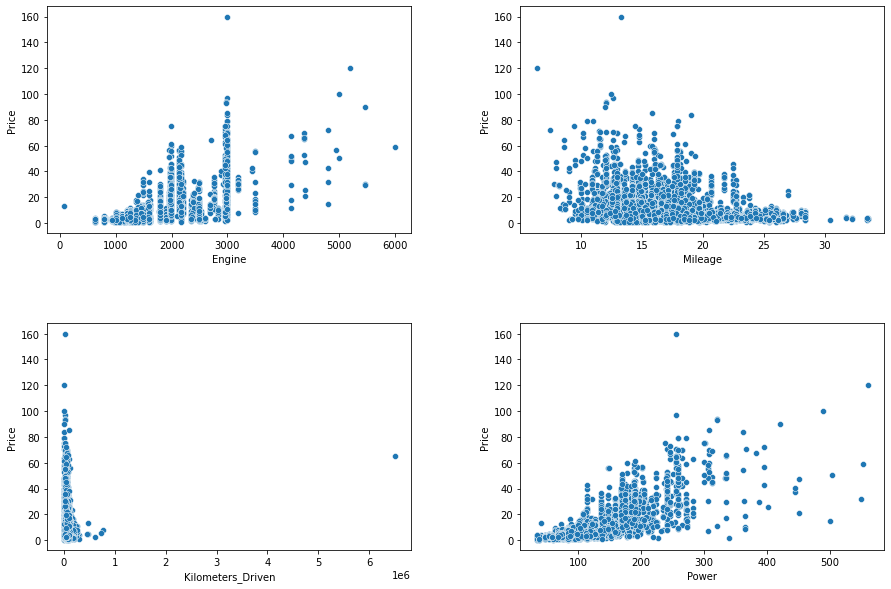

In [19]:
fig = plt.figure(figsize = (15,10))

fig.subplots_adjust(hspace = 0.4, wspace =0.3)
plt.subplot(2,2,1)
sns.scatterplot(x = 'Engine',y = 'Price',data = DT)

plt.subplot(2,2,2)
sns.scatterplot(x = 'Mileage',y = 'Price',data = DT)

plt.subplot(2,2,3)
sns.scatterplot(x = 'Kilometers_Driven',y = 'Price',data = DT)

plt.subplot(2,2,4)
sns.scatterplot(x = 'Power',y = 'Price',data = DT)

plt.show()

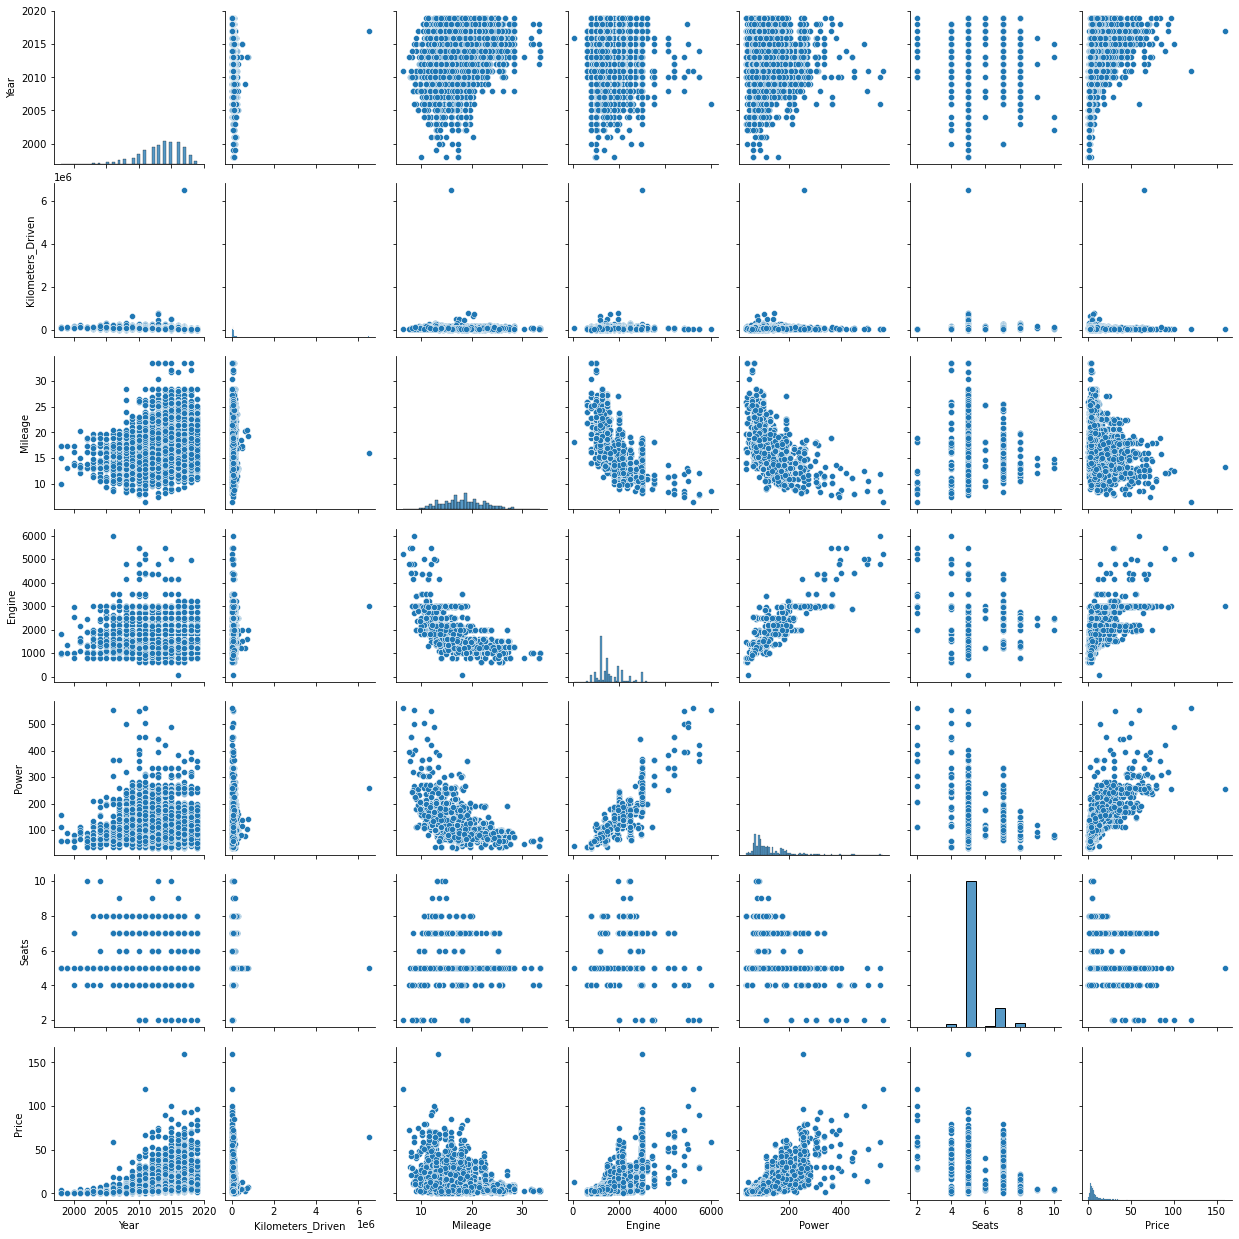

In [20]:
sns.pairplot(DT)

In [21]:
#Droping one row because Kilometer_driven have one outlier
kdriven = DT[DT.Kilometers_Driven>1000000].index.tolist()
DT.drop(labels = kdriven ,inplace =True)
DT.shape

(5949, 12)

## Exploratory Analysis of our datasheet

In [22]:
#Brand is the new coloumn containing only the Brand Name of cars#
DT['Brand'] = DT.Name.str.split().str.get(0)
DT.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


### Finding the relation between 'Price' and the independent variables.

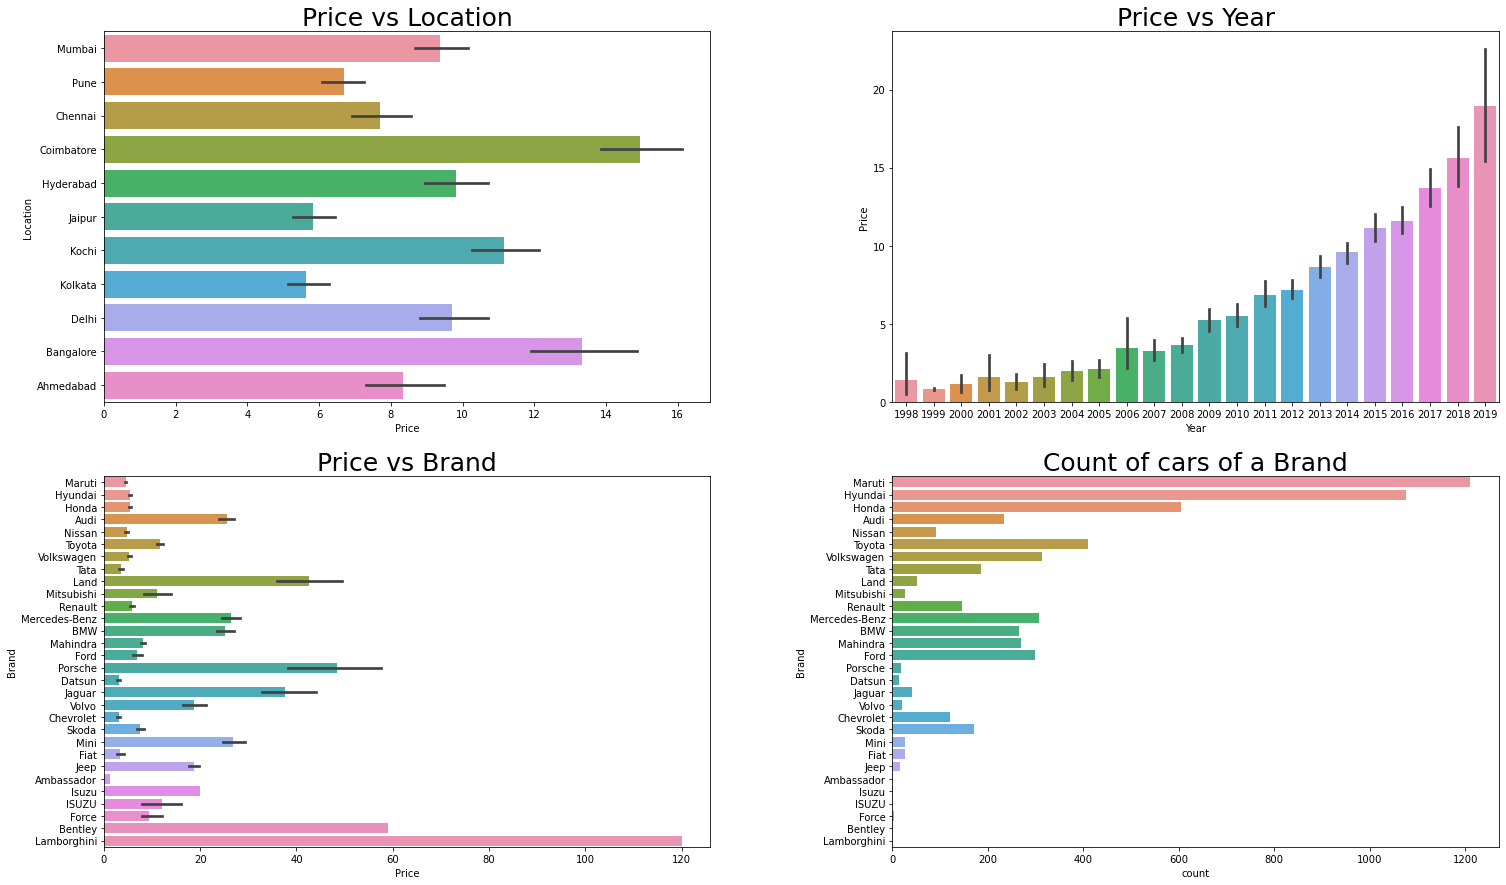

In [23]:
import seaborn as sns

fig = plt.figure(figsize = (25,15))

fig.subplots_adjust(hspace = 0.2, wspace =0.3)
plt.subplot(2,2,1)
#Relation between Price and location
sns.barplot(x = 'Price', y ='Location', data  = DT)
plt.title('Price vs Location',fontsize  =25)

#Relation between Price and year
plt.subplot(2,2,2)
sns.barplot(x ='Year', y ='Price', data  = DT)
plt.title('Price vs Year',fontsize  =25)

#Relation between Price and Brand
plt.subplot(2,2,3)
sns.barplot(x = 'Price', y ='Brand', data  = DT)
plt.title('Price vs Brand',fontsize  =25)

#Counting the which brand have most number of cars in our datasheet 
plt.subplot(2,2,4)
sns.countplot(y ='Brand', data  = DT)
plt.title('Count of cars of a Brand',fontsize  =25)

plt.show()

1.Price of cars are highest in Coimbatore and Banglore while lowest in Jaipur and kolkata.

2.The Price of cars increases gradually year by year except the price drops slightly in year 2007

3.The Highest price of car is Lamborghini and lowest price of car is Maruti and thus the highest number of cars owned by people is of brand Maruti and hardly two car is owned of brand lamborghini by people.

4.While Mercedenz-Benz and BMW cars are owned by moderate amount of people despite of their high prices.

NOTE :- We can say that the lesser the price of a car then it is more likely to be bought by people.

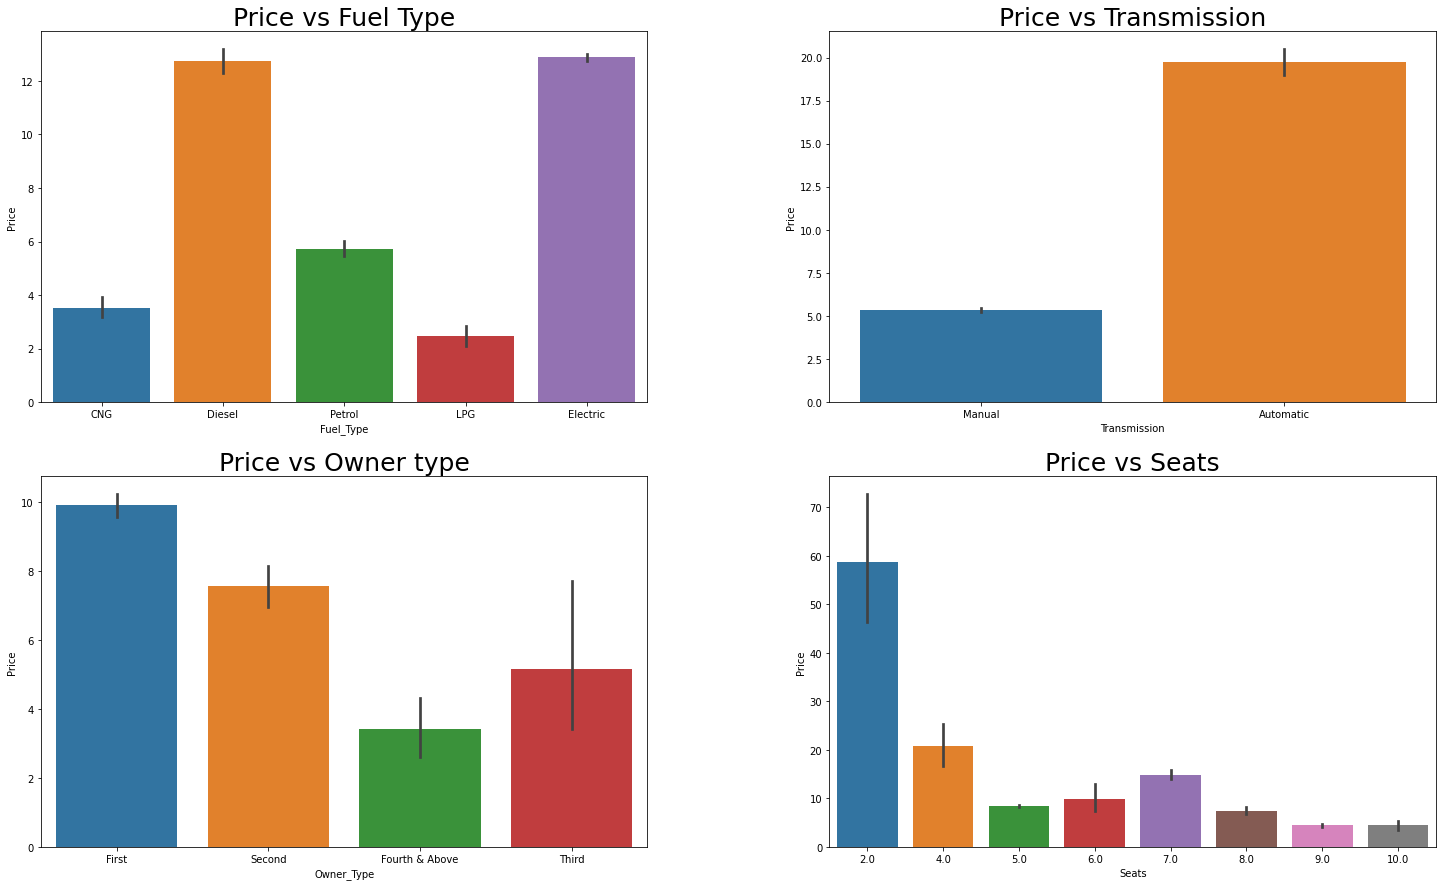

In [24]:
import seaborn as sns

fig = plt.figure(figsize = (25,15))

fig.subplots_adjust(hspace = 0.2, wspace =0.3)
plt.subplot(2,2,1)
#Relation between Price and Fuel type
sns.barplot(x = 'Fuel_Type', y = 'Price', data  = DT)
plt.title('Price vs Fuel Type',fontsize  =25)

#Relation between Price and transmission
plt.subplot(2,2,2)
sns.barplot(x ='Transmission', y ='Price', data  = DT)
plt.title('Price vs Transmission',fontsize  =25)

#Relation between price and owner type
plt.subplot(2,2,3)
sns.barplot(x ='Owner_Type', y ='Price', data  = DT)
plt.title('Price vs Owner type',fontsize  =25)

#Relation between price and seats
plt.subplot(2,2,4)
sns.barplot(x ='Seats', y ='Price', data  = DT)
plt.title('Price vs Seats',fontsize  =25)

plt.show()

1.According to our datasheet price of Diesel and Electric type of cars is highest below that price is Petrol type cars.while CNG and LPG car type prices are lowest.

2.Cleary from graph of Price vs Transimission Automatic cars have higher prices than Manual type.

3.As the number of owner of a car increases the price of that car decreases.

4.Two seater cars has the Highest prices and as the seats increases in cars the prices decreases.

NOTE :- Condition for high price car :-

1.Should be diesel or electric.

2.Automatic in trasmission.

3.Should be a New car or atleats a second-hand car.

4.Should have Least number of seats.

## Encoding the categorical coloumns :-

In [25]:
df = DT
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5949 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5949 non-null   object 
 1   Location           5949 non-null   object 
 2   Year               5949 non-null   int64  
 3   Kilometers_Driven  5949 non-null   int64  
 4   Fuel_Type          5949 non-null   object 
 5   Transmission       5949 non-null   object 
 6   Owner_Type         5949 non-null   object 
 7   Mileage            5949 non-null   float64
 8   Engine             5949 non-null   float64
 9   Power              5949 non-null   float64
 10  Seats              5949 non-null   float64
 11  Price              5949 non-null   float64
 12  Brand              5949 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 650.7+ KB


In [26]:
df2 = df.groupby(by = 'Brand').mean()['Price'].sort_values().reset_index()

In [27]:
df2

,Brand,Price
0,Ambassador,1.350000
1,Chevrolet,3.044463
2,Datsun,3.049231
3,Fiat,3.370000
4,Tata,3.562849
5,Maruti,4.519926
6,Nissan,4.738352
7,Volkswagen,5.306815
8,Honda,5.428165
9,Hyundai,5.447823


In [28]:
def car_band(x):
    if x in ['Land', 'Lamborghini', 'Jaguar', 'BMW', 'Mercedes-Benz', 'Porsche',
       'Audi', 'Bentley','Mini']:
        return 'HIGH END CAR'    
    elif x in ['Ford',
            'Skoda',
         'Mahindra',
            'Force',
       'Mitsubishi',
           'Toyota',
            'ISUZU',
             'Jeep',
           'Volvo',
          'Isuzu']:
        return 'MIDDLE RANGE CAR'
    else:
        return 'LOW END CAR'
    

In [29]:
df['CAR BAND'] = df['Brand']

In [30]:
df['CAR BAND'] = df['CAR BAND'].apply(car_band)

In [31]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand', 'CAR BAND'],
      dtype='object')

In [32]:
df.sort_values('Price',ascending=False)[:200]['Brand'].unique()

array(['Land', 'Lamborghini', 'Jaguar', 'BMW', 'Mercedes-Benz', 'Porsche',
       'Audi', 'Bentley', 'Ford', 'Mini'], dtype=object)

In [33]:
df.shape

(5949, 14)

In [34]:
one_hot_trans1 = pd.get_dummies(df['CAR BAND'])
df = df.join(one_hot_trans1)

one_hot_trans1 = pd.get_dummies(df['Transmission'])
df = df.join(one_hot_trans1)

one_hot_trans2 = pd.get_dummies(df['Fuel_Type'])
df = df.join(one_hot_trans2)

one_hot_trans3 = pd.get_dummies(df['Owner_Type'])
df = df.join(one_hot_trans3)

one_hot_trans1 = pd.get_dummies(df['Location'])
df = df.join(one_hot_trans1)

In [35]:
df.drop('CAR BAND',axis = 1,inplace = True)
df.drop('LOW END CAR',axis = 1,inplace = True)

In [36]:
df.drop('Transmission',axis = 1,inplace = True)
df.drop('Fuel_Type',axis = 1,inplace = True)
df.drop('Manual',axis = 1,inplace = True)
df.drop('Owner_Type',axis = 1,inplace = True)
df.drop('LPG',axis = 1,inplace = True)
df.drop('Fourth & Above',axis = 1,inplace = True)
df.drop('Kochi',axis = 1, inplace = True)
df.drop('Location',axis = 1, inplace = True)
df.drop('Name',axis = 1, inplace = True)
df.drop('Brand',axis = 1, inplace = True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5949 entries, 0 to 6018
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5949 non-null   int64  
 1   Kilometers_Driven  5949 non-null   int64  
 2   Mileage            5949 non-null   float64
 3   Engine             5949 non-null   float64
 4   Power              5949 non-null   float64
 5   Seats              5949 non-null   float64
 6   Price              5949 non-null   float64
 7   HIGH END CAR       5949 non-null   uint8  
 8   MIDDLE RANGE CAR   5949 non-null   uint8  
 9   Automatic          5949 non-null   uint8  
 10  CNG                5949 non-null   uint8  
 11  Diesel             5949 non-null   uint8  
 12  Electric           5949 non-null   uint8  
 13  Petrol             5949 non-null   uint8  
 14  First              5949 non-null   uint8  
 15  Second             5949 non-null   uint8  
 16  Third              5949 

## Data scaling of coloumns :-['Kilometer_Driven','Power','Mileage','Engine']

In [38]:
df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,HIGH END CAR,MIDDLE RANGE CAR,Automatic,...,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kolkata,Mumbai,Pune
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [39]:
df.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'HIGH END CAR', 'MIDDLE RANGE CAR', 'Automatic', 'CNG',
       'Diesel', 'Electric', 'Petrol', 'First', 'Second', 'Third', 'Ahmedabad',
       'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur',
       'Kolkata', 'Mumbai', 'Pune'],
      dtype='object')

In [40]:
LE_DT = df
LE_DT.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,HIGH END CAR,MIDDLE RANGE CAR,Automatic,...,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kolkata,Mumbai,Pune
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [41]:
# scaling the columns KMs_driven, mileage, power and engine using Standardisation

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
LE_DT['KMs_scaled'] = scaler.fit_transform(LE_DT[['Kilometers_Driven']])
LE_DT['Mileage_scaled'] = scaler.fit_transform(LE_DT[['Mileage']])
LE_DT['Engine_scaled'] = scaler.fit_transform(LE_DT[['Engine']])
LE_DT['Power_scaled'] = scaler.fit_transform(LE_DT[['Power']])

In [42]:
LE_DT.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,HIGH END CAR,MIDDLE RANGE CAR,Automatic,...,Delhi,Hyderabad,Jaipur,Kolkata,Mumbai,Pune,KMs_scaled,Mileage_scaled,Engine_scaled,Power_scaled
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,1,0,0.384528,1.978090,-1.040981,-1.030531
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,0,0,0,0,1,-0.436482,0.317722,-0.062755,0.245812
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,0,0,0,0,0,0,-0.304061,-0.034477,-0.704297,-0.457640
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,0,...,0,0,0,0,0,0,0.781790,0.581273,-0.622220,-0.456515
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,1,...,0,0,0,0,0,0,-0.445221,-0.753251,0.583812,0.519689


In [43]:
df.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'HIGH END CAR', 'MIDDLE RANGE CAR', 'Automatic', 'CNG',
       'Diesel', 'Electric', 'Petrol', 'First', 'Second', 'Third', 'Ahmedabad',
       'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur',
       'Kolkata', 'Mumbai', 'Pune', 'KMs_scaled', 'Mileage_scaled',
       'Engine_scaled', 'Power_scaled'],
      dtype='object')

In [44]:
df1 = df[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'HIGH END CAR', 'MIDDLE RANGE CAR', 'Automatic', 'CNG',
       'Diesel', 'Electric', 'Petrol', 'First', 'Second', 'Third', 'Ahmedabad',
       'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur',
       'Kolkata', 'Mumbai', 'Pune']]

In [45]:
df1

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,HIGH END CAR,MIDDLE RANGE CAR,Automatic,...,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kolkata,Mumbai,Pune
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [46]:
X = df.iloc[:, df.columns!='Price']
y = df['Price']

In [47]:
df.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'HIGH END CAR', 'MIDDLE RANGE CAR', 'Automatic', 'CNG',
       'Diesel', 'Electric', 'Petrol', 'First', 'Second', 'Third', 'Ahmedabad',
       'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur',
       'Kolkata', 'Mumbai', 'Pune', 'KMs_scaled', 'Mileage_scaled',
       'Engine_scaled', 'Power_scaled'],
      dtype='object')

In [48]:
X = df[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'HIGH END CAR', 'MIDDLE RANGE CAR', 'Automatic', 'CNG',
       'Diesel', 'Electric', 'Petrol', 'First', 'Second', 'Third', 'Ahmedabad',
       'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur',
       'Kolkata', 'Mumbai', 'Pune']]
y = df['Price']

In [49]:
# Splitting the data into train and test data, allocating 25% for testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

## LinearRegression Model

In [51]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [52]:
lm.fit(X_train,y_train)

LinearRegression()

In [53]:
    lm.coef_

array([ 9.71851643e-01, -2.33945596e-05, -1.15393444e-01,  3.32818133e-03,
        7.17598367e-02, -4.25883931e-01,  1.04299181e+01, -9.50515471e-02,
       -2.55131251e-01, -1.13842868e-01, -9.37094093e-01,  9.99016498e+00,
       -1.80967224e+00, -1.37086334e+00, -2.01130943e+00,  8.37731262e-02,
        4.87658062e-01,  2.08196371e+00,  1.83644184e+00,  1.95767064e+00,
        1.89187091e-01,  2.47752730e+00,  1.31176662e+00, -1.20532860e+00,
       -6.75627327e-01,  8.45251504e-01])

In [54]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

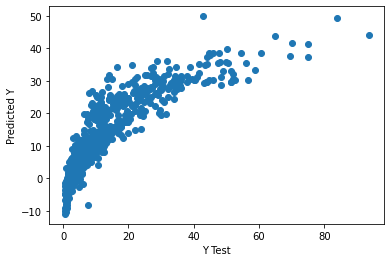

In [55]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

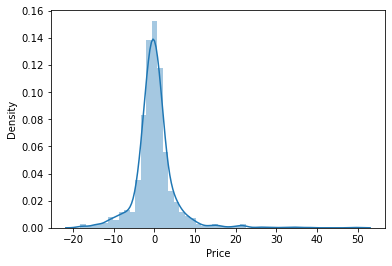

In [57]:
import warnings
warnings.filterwarnings('ignore')

sns.distplot((y_test-predictions),bins=50);

In [58]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.0249243682161477
MSE: 25.624837713884
RMSE: 5.062098153323777


In [59]:
df.columns


Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'HIGH END CAR', 'MIDDLE RANGE CAR', 'Automatic', 'CNG',
       'Diesel', 'Electric', 'Petrol', 'First', 'Second', 'Third', 'Ahmedabad',
       'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur',
       'Kolkata', 'Mumbai', 'Pune', 'KMs_scaled', 'Mileage_scaled',
       'Engine_scaled', 'Power_scaled'],
      dtype='object')

In [60]:
X = df[['Year', 'Seats',
       'Price', 'Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
       'Hyderabad', 'Jaipur', 'HIGH END CAR', 'MIDDLE RANGE CAR','Kolkata', 'Mumbai', 'Pune', 'Automatic', 'CNG',
       'Diesel', 'Electric', 'Petrol', 'First', 'Second', 'Third',
       'KMs_scaled', 'Mileage_scaled', 'Engine_scaled', 'Power_scaled']]
y = df['Automatic']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## LogisticRegression Model

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [64]:
predictions = logmodel.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix,classification_report

In [66]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1381
           1       1.00      1.00      1.00       583

    accuracy                           1.00      1964
   macro avg       1.00      1.00      1.00      1964
weighted avg       1.00      1.00      1.00      1964

[[1381    0]
 [   0  583]]


In [67]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


In [68]:
df1

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,HIGH END CAR,MIDDLE RANGE CAR,Automatic,...,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kolkata,Mumbai,Pune
0,2010,72000,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,1,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,1,0,...,0,0,0,0,0,0,1,0,0,0
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [69]:
df1.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'HIGH END CAR', 'MIDDLE RANGE CAR', 'Automatic', 'CNG',
       'Diesel', 'Electric', 'Petrol', 'First', 'Second', 'Third', 'Ahmedabad',
       'Bangalore', 'Chennai', 'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur',
       'Kolkata', 'Mumbai', 'Pune'],
      dtype='object')

In [70]:
X = df[['Year', 'Seats',
       'Price', 'Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
       'Hyderabad', 'Jaipur', 'HIGH END CAR', 'MIDDLE RANGE CAR','Kolkata', 'Mumbai', 'Pune', 'Automatic', 'CNG',
       'Diesel', 'Electric', 'Petrol', 'First', 'Second', 'Third',
       'KMs_scaled', 'Mileage_scaled', 'Engine_scaled', 'Power_scaled']]
y = df['Automatic']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## KNN model

In [72]:
knn = KNeighborsClassifier(n_neighbors=1)

In [73]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [74]:
pred = knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

In [75]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[1348   33]
 [  65  518]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1381
           1       0.94      0.89      0.91       583

    accuracy                           0.95      1964
   macro avg       0.95      0.93      0.94      1964
weighted avg       0.95      0.95      0.95      1964



In [76]:
error_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

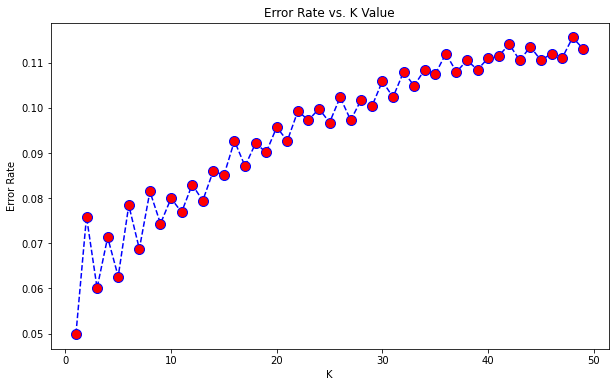

In [77]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [78]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred_i))
print('MSE:', metrics.mean_squared_error(y_test, pred_i))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_i)))

MAE: 24.55600814663951
MSE: 0.11303462321792261
RMSE: 0.33620622126594063
